In [28]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import piplite
await piplite.install('seaborn')
import seaborn as sns
from scipy import stats

In [29]:
df = pd.read_csv('ASSWLift.csv')
df.head(10)


,state_name,district_name,block_tehsil_name,village_name,s_no_of_scheme,ref_scheme_type_surface_flow_name,ref_scheme_type_surface_lift_name,ref_scheme_owner_name,total_owners_holding,ref_scheme_owner_social_status_name,...,ipu_other_season,ipu_total,ref_selection_id_under_utilisation_name,ref_reason_for_under_utilisation_name,scheme_designed_storage,ref_filled_up_storage_name,ref_filled_up_storage_space_name,villages_covered,s_no_scheme_within_village_in_water_body,total_no_of_schemes_in_village_above_water_body
0,ASSAM,BAKSA,TIHU-BARAMA,NAKUCHI,1,NaN,On-River,Others,NaN,NaN,...,0.0,0.25,No,NaN,NaN,NaN,NaN,1,1.0,1.0
1,ASSAM,BAKSA,GORESWAR,DABOSILA ( DABKHILA ),2,NaN,On Tanks/Ponds/Reservoirs/check dams,Others,NaN,NaN,...,0.8,4.00,NaN,NaN,2.0,Full,Filled up every year,1,1.0,1.0
2,ASSAM,BAKSA,GORESWAR,MAGURMARI,2,NaN,Others,Others,NaN,NaN,...,0.0,3.30,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0
3,ASSAM,BAKSA,GORESWAR,NATHKUCHI,2,NaN,On-River,Others,NaN,NaN,...,0.5,3.00,No,NaN,NaN,NaN,NaN,1,1.0,1.0
4,ASSAM,BAKSA,GORESWAR,ROUMARI NO.1,1,NaN,On Tanks/Ponds/Reservoirs/check dams,Others,NaN,NaN,...,0.0,15.00,NaN,NaN,2.0,Full,Filled up every year,1,1.0,1.0
5,ASSAM,BAKSA,GORESWAR,NIJ BETNA,2,NaN,On Tanks/Ponds/Reservoirs/check dams,Others,NaN,NaN,...,0.0,4.00,No,NaN,2.0,Full,Filled up every year,1,1.0,1.0
6,ASSAM,BAKSA,GORESWAR,KARIPARA,1,NaN,On Tanks/Ponds/Reservoirs/check dams,Others,NaN,NaN,...,0.5,1.50,No,NaN,2.0,Full,Filled up every year,1,1.0,1.0
7,ASSAM,BAKSA,GORESWAR,BARPATHAR,1,NaN,On Tanks/Ponds/Reservoirs/check dams,Others,NaN,NaN,...,0.5,3.50,NaN,NaN,2.0,Full,Filled up every year,1,1.0,1.0
8,ASSAM,BAKSA,GORESWAR,FUHURABARI,1,NaN,On Tanks/Ponds/Reservoirs/check dams,Others,NaN,NaN,...,0.4,2.40,No,NaN,2.0,Full,Filled up every year,1,1.0,1.0
9,ASSAM,BAKSA,GORESWAR,RAMCHA,2,NaN,On Tanks/Ponds/Reservoirs/check dams,Others,NaN,NaN,...,1.0,3.00,No,NaN,2.0,Full,Filled up every year,1,1.0,1.0


In [30]:
#1. Remove duplicate rows
df = df.drop_duplicates()
numeric_cols = df.select_dtypes(include=['number']).columns

# Fill NaN values in numeric columns with the column mean
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
print(df[numeric_cols])


      s_no_of_scheme  ref_scheme_type_surface_flow_name  total_owners_holding  \
0                  1                                NaN               0.93643   
1                  2                                NaN               0.93643   
2                  2                                NaN               0.93643   
3                  2                                NaN               0.93643   
4                  1                                NaN               0.93643   
...              ...                                ...                   ...   
7565               1                                NaN               0.93643   
7566               1                                NaN               0.93643   
7567               1                                NaN               0.93643   
7568               1                                NaN               0.93643   
7569               1                                NaN               0.93643   

      scheme_construction_c

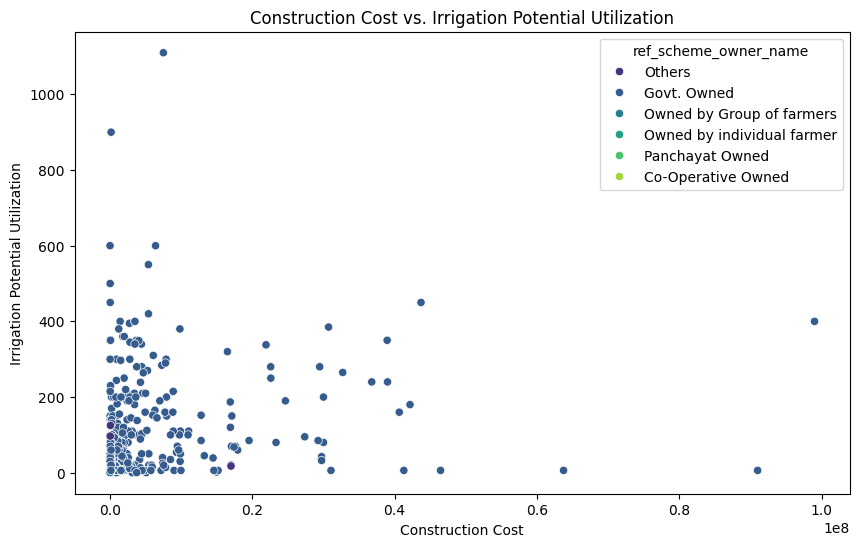

In [31]:
# 2. Financial Investment vs. Scheme Efficiency
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="scheme_construction_cost", y="ipu_total", hue="ref_scheme_owner_name", palette="viridis")
plt.title("Construction Cost vs. Irrigation Potential Utilization")
plt.xlabel("Construction Cost")
plt.ylabel("Irrigation Potential Utilization")
plt.show()

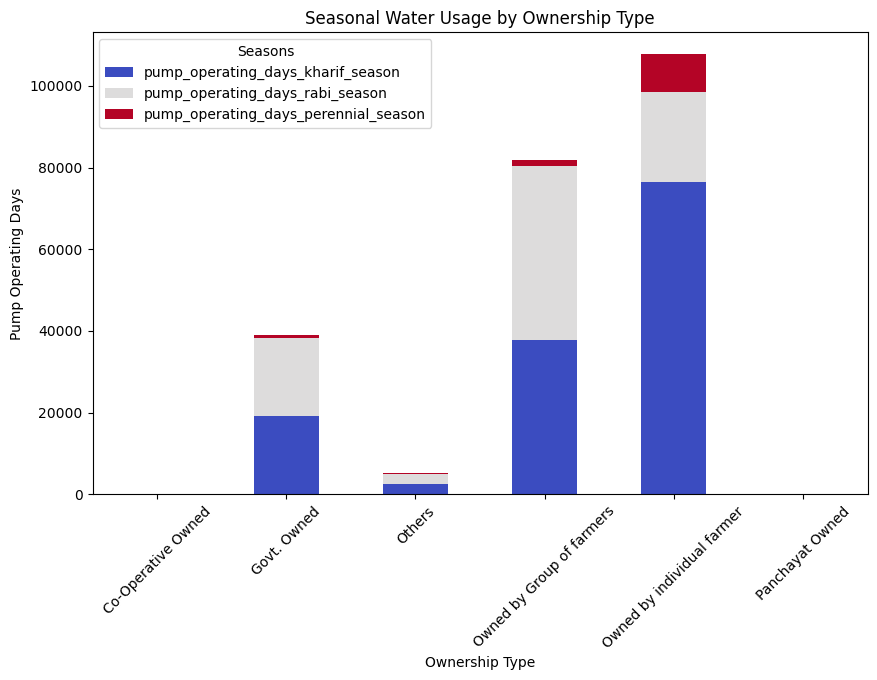

In [32]:
# 3. Seasonal Water Usage Trends Across Different Ownership Types
seasonal_usage = df.groupby("ref_scheme_owner_name")[['pump_operating_days_kharif_season', 'pump_operating_days_rabi_season', 'pump_operating_days_perennial_season']].sum()
seasonal_usage.plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')
plt.title("Seasonal Water Usage by Ownership Type")
plt.xlabel("Ownership Type")
plt.ylabel("Pump Operating Days")
plt.xticks(rotation=45)
plt.legend(title="Seasons")
plt.show()

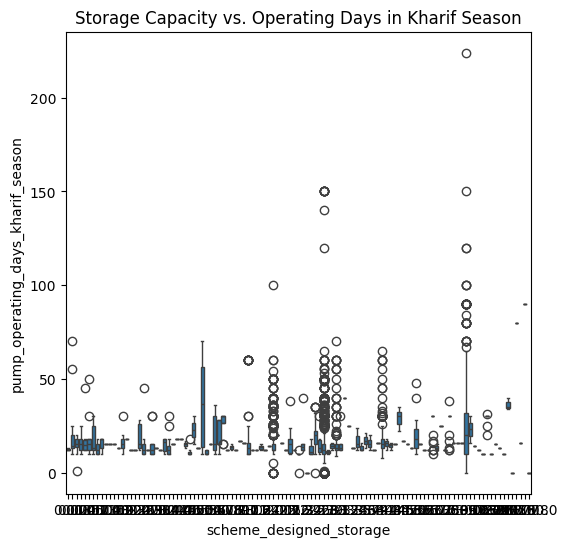

In [33]:
# 4. Impact of Storage Capacity on Operational Days
plt.figure(figsize=(6,6))
sns.boxplot(x=df['scheme_designed_storage'], y=df['pump_operating_days_kharif_season']) #hue=df['scheme_designed_storage'], palette="coolwarm", dodge=False, legend=False)
plt.title("Storage Capacity vs. Operating Days in Kharif Season")
#plt.xticks(rotation=90)
plt.show()


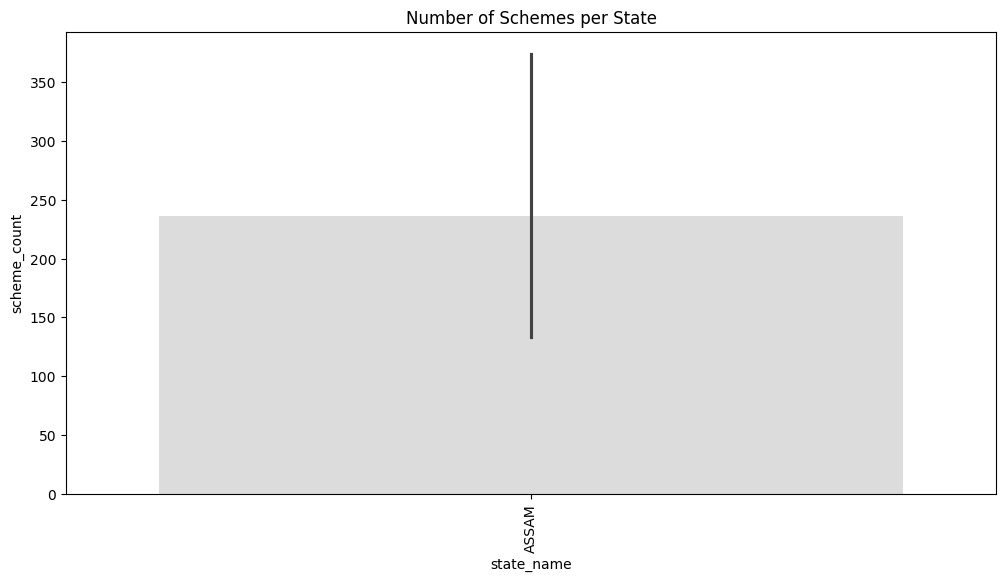

In [34]:
# 5. Geospatial Distribution of Irrigation Schemes
df_geo_counts = df.groupby(['state_name', 'district_name']).size().reset_index(name='scheme_count')
plt.figure(figsize=(12,6))
sns.barplot(x=df_geo_counts['state_name'], y=df_geo_counts['scheme_count'], hue=df_geo_counts['state_name'], palette='coolwarm', legend=False)
plt.xticks(rotation=90)
plt.title("Number of Schemes per State")
plt.show()

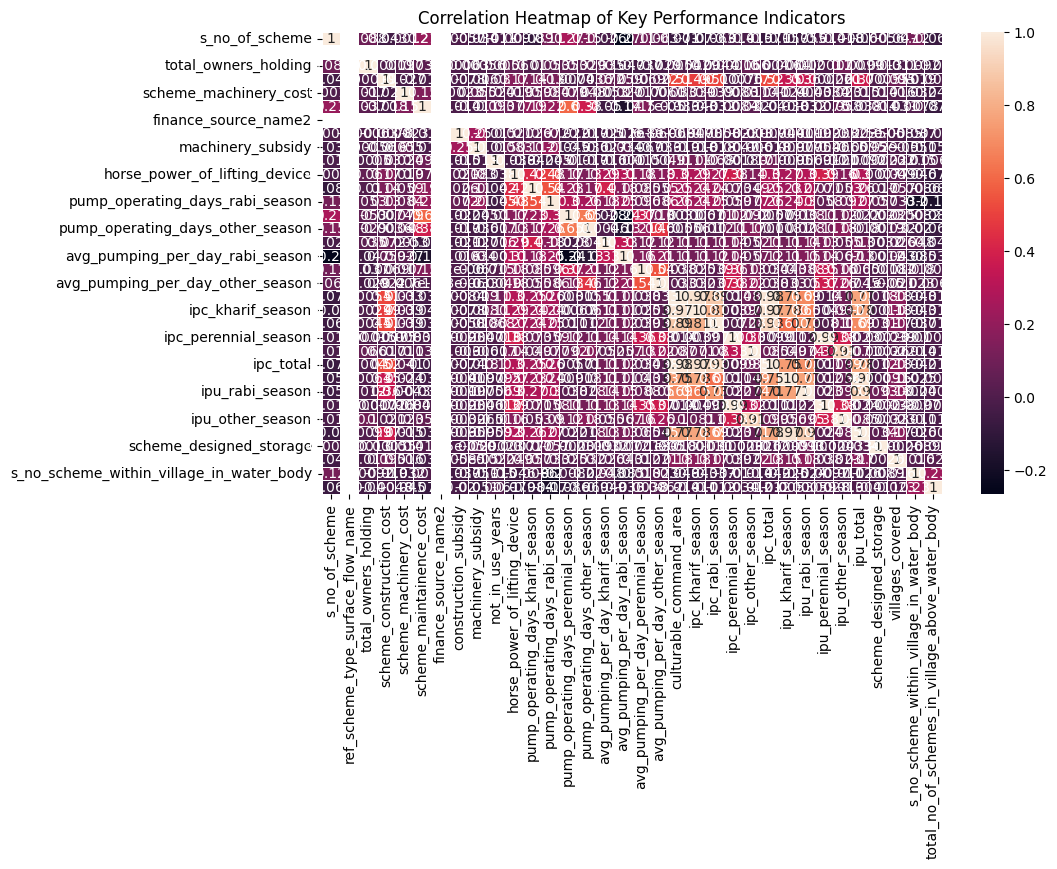

In [35]:
# 6. Correlation Analysis of Key Performance Metrics
plt.figure(figsize=(10,6))
df_numeric = df.select_dtypes(include=['number'])
sns.heatmap(df_numeric.corr() ,annot=True, linewidths=0.5)
plt.title("Correlation Heatmap of Key Performance Indicators")
plt.show()



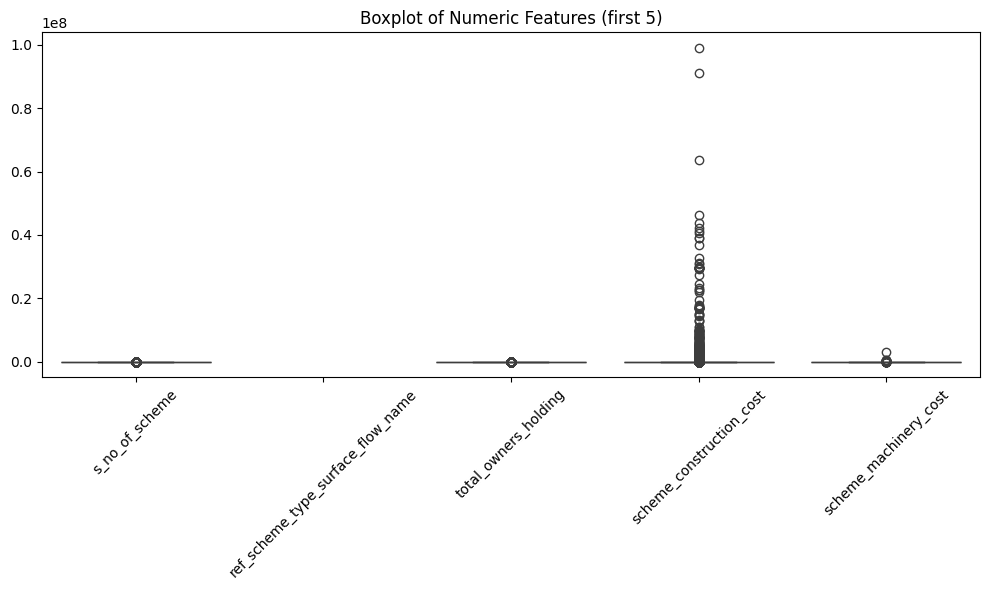

In [44]:
# 7. Anomaly Detection and Outlier Analysis
z_scores = np.abs(stats.zscore(df[numeric_cols]))
z_outliers = (z_scores > 3)
z_filtered_df = df[(z_scores < 3).all(axis=1)]
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_cols].iloc[:, :5])  # Show only first 5 numeric columns
plt.title("Boxplot of Numeric Features (first 5)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [49]:
#removing outliers by z-score method
z_scores = stats.zscore(df[numeric_cols])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_z_cleaned = df[filtered_entries]
print(len(df_z_cleaned))


0
